In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
import openpathsampling.storage as st

In [2]:
old_store = st.AnalysisStorage("mstis.nc")

In [23]:
network = old_store.networks[0]
engine = old_store.engines[0]
template = old_store.snapshots[0]

In [24]:
scheme = paths.SRTISScheme(network)

In [4]:
final_samp0 = old_store.steps[len(old_store.steps)-1].active[0]

In [5]:
sset = paths.SampleSet([final_samp0])

In [6]:
storage = st.Storage("srtis.nc", "w", template)

In [25]:
srtis = paths.PathSampling(
    storage=storage,
    globalstate=sset,
    engine=engine,
    move_scheme=scheme
)

In [34]:
import math
n_steps_to_run = int(math.ceil(scheme.n_steps_for_trials(scheme.movers['minus'][0], 3)))
print n_steps_to_run

3691


In [ ]:
srtis.run_until(n_steps_to_run)

Working on Monte Carlo cycle number 1770.



In [9]:
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML

def ipynb_visualize(movevis):
    """Default settings to show a movevis in an ipynb."""
    view = movevis.renderer
    view.zoom = 1.5
    view.scale_y = 18
    view.scale_th = 20
    view.font_size = 0.4
    return view

In [10]:
scheme = paths.SRTISScheme(network)
move_decision_tree = scheme.move_decision_tree()
all_ensembles = network.all_ensembles

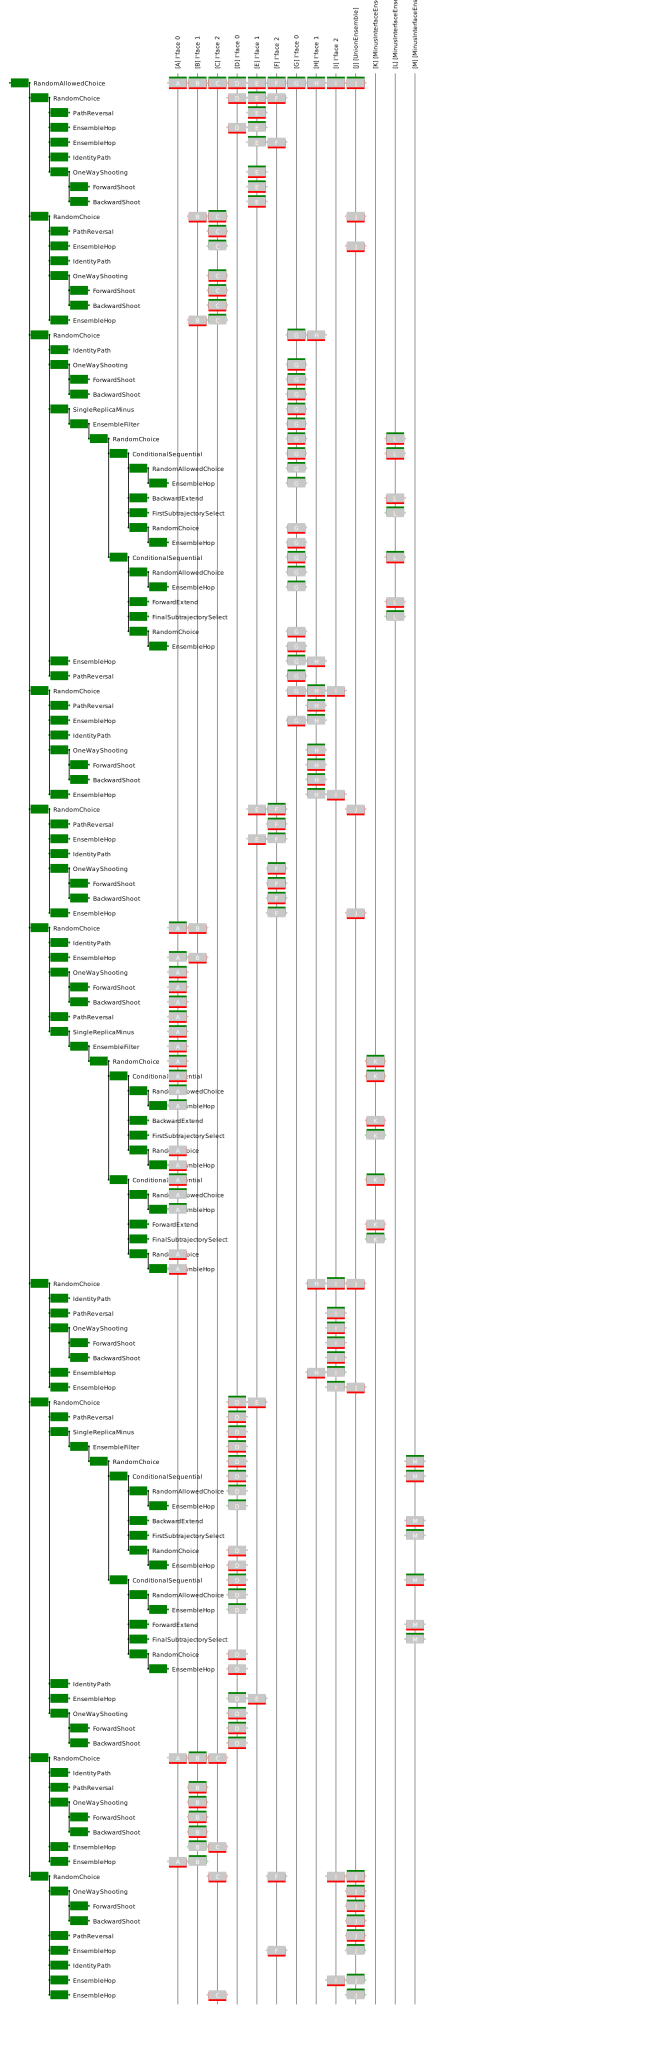

In [11]:
movevis = paths.visualize.MoveTreeBuilder()
movevis.mover(move_decision_tree, all_ensembles)
SVG(ipynb_visualize(movevis).to_svg())